# Machine Learning–Driven Cyber Threat Analytics: A Regression-Based Approach

## Submitted By  
**Ashutosh Kumar Verma** (Student ID: 475852)  
**Ramik Sharma** (Student ID: 477656)

---

## Abstract

This project presents a comprehensive and rigorously validated machine learning framework for **cyber threat analytics using regression modeling**, applied to the UNSW-NB15 network intrusion dataset. The study addresses the challenge of **predicting continuous network traffic and performance metrics** to support proactive cyber defense, capacity planning, and performance monitoring.

The proposed methodology explicitly incorporates **duplicate record removal, systematic data leakage prevention, domain-informed feature engineering, and hyperparameter tuning**, followed by a comparative evaluation of multiple **tree-based regression algorithms**. Model performance is assessed using **cross-validated regression metrics**, with final validation conducted on **completely unseen holdout data** to ensure realistic generalization. Additionally, prediction residuals are analyzed as indicators of anomalous or abnormal network behavior, strengthening the project’s applicability to real-world cyber threat analytics.

**Keywords**: Cybersecurity, Machine Learning, Network Traffic Prediction, Regression Analysis, Performance Monitoring, Data Leakage Prevention

---

## 1. Introduction

### 1.1 Problem Statement

Accurate prediction of network traffic behavior is a critical component of modern cyber threat analytics, enabling proactive detection of anomalies, informed capacity planning, and effective performance optimization. Conventional network monitoring systems are largely reactive, identifying issues only after performance degradation or security incidents occur.

Machine learning–based regression techniques provide predictive capabilities that allow network administrators to **anticipate traffic patterns and network performance characteristics**. Deviations between predicted and observed values can further be exploited as signals of abnormal or potentially malicious activity. This project focuses on developing **robust, leakage-resistant regression models** with strong generalization guarantees through rigorous validation on unseen data.

---

### 1.2 Project Objectives

The primary objectives of this study are:

1. **Traffic Volume Prediction**  
   Develop regression models to estimate data transfer volumes for network capacity planning.

2. **Connection Duration Prediction**  
   Forecast session durations to support connection management and resource allocation.

3. **Network Performance Prediction**  
   Predict key performance metrics for quality-of-service (QoS) monitoring.

4. **Feature Importance Analysis**  
   Identify the most influential features driving network traffic behavior using model-based importance measures.

5. **Robust Model Optimization and Validation**  
   Apply cross-validation and hyperparameter tuning to ensure stable and generalizable performance.

6. **Anomaly Identification via Prediction Error**  
   Use regression residuals as indicators of unusual or potentially malicious network behavior.

---

### 1.3 Dataset Description

**Dataset**: UNSW-NB15 Network Intrusion Detection Dataset  
**Source**: University of New South Wales (UNSW), Canberra Cyber Range Lab  
**Scale**: Approximately 2.5 million network flow records distributed across four CSV files  
**Features**: 49 attributes capturing network flow statistics, protocol information, and performance-related metrics  

#### Target Variables for Regression

The regression analysis focuses on predicting the following continuous-valued network attributes:

- `dur` – Connection duration (seconds)  
- `sbytes` – Bytes transferred from source to destination  
- `dbytes` – Bytes transferred from destination to source  
- `Sload` – Source bits per second  
- `Dload` – Destination bits per second  
- `tcprtt` – TCP round-trip time  
- `synack` – TCP SYN-ACK response time  
- `ackdat` – TCP ACK-DATA transmission time  

---

### 1.4 Methodology Overview

The project follows a **structured, regression-specific machine learning pipeline**, designed to address common pitfalls such as data leakage, duplicate bias, and overfitting:

1. **Data Preprocessing and Integrity Checks**  
   Memory-efficient data loading using a 3+1 file strategy, systematic handling of missing values, and **explicit removal of duplicate records** to prevent biased error estimates.

2. **Exploratory Data Analysis (EDA)**  
   Statistical analysis of dataset structure and target variable behavior, including skewness, outliers, and scale characteristics relevant to regression modeling.

3. **Data Leakage Prevention**  
   Careful inspection of feature semantics and domain relationships to identify and exclude attributes that may encode target information directly or indirectly. Leakage checks are performed strictly on training data.

4. **Feature Engineering and Exploratory Importance Analysis**  
   Construction of domain-informed derived features and exploratory assessment of feature relevance using **tree-based model feature importance**, avoiding high-dimensional statistical feature selection to ensure computational feasibility.

5. **Baseline Modeling**  
   Implementation of naive regression baselines to contextualize model performance and establish reference error levels.

6. **Model Training and Hyperparameter Tuning**  
   Training of multiple **tree-based regression models**, including decision trees and ensemble methods, with hyperparameter optimization performed using cross-validation on training data only.

7. **Cross-Validated Model Evaluation**  
   Performance assessment using regression metrics such as MAE, RMSE, and R², reported as mean values across cross-validation folds.

8. **Holdout Validation on Unseen Data**  
   Final evaluation on a completely unseen dataset (File 4) to approximate real-world deployment performance and assess model generalization.

---


In [1]:
# -------------------------------------------------------------
# Core Libraries
# -------------------------------------------------------------
import pandas as pd
import numpy as np

# -------------------------------------------------------------
# Visualization (Lightweight)
# -------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------------------------------------
# Model Selection and Validation
# -------------------------------------------------------------
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.dummy import DummyRegressor

# -------------------------------------------------------------
# Tree-Based Regression Models (Memory-Safe)
# -------------------------------------------------------------
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# -------------------------------------------------------------
# Evaluation Metrics
# -------------------------------------------------------------
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# -------------------------------------------------------------
# Utilities
# -------------------------------------------------------------
from datetime import datetime
import warnings
import gc

# -------------------------------------------------------------
# Visualization & Warning Settings
# -------------------------------------------------------------
plt.style.use("seaborn-v0_8")
sns.set_palette("husl")
warnings.filterwarnings("ignore")

print("Libraries imported successfully!")
print(f"Analysis started at: {datetime.now()}")

# -------------------------------------------------------------
# Memory Management Helper
# -------------------------------------------------------------
def free_memory(*objs):
    """
    Explicitly delete objects and invoke garbage collection
    to reduce memory pressure in constrained environments.
    """
    for obj in objs:
        try:
            del obj
        except Exception:
            pass
    gc.collect()


Libraries imported successfully!
Analysis started at: 2026-01-25 21:55:08.305949


## 2. Data Loading and Preprocessing

### 2.1 Memory-Efficient and Leakage-Safe Data Loading Strategy

Due to the large scale of the UNSW-NB15 dataset, a **memory-efficient and leakage-safe data loading strategy** was adopted to support stable model development while ensuring rigorous and unbiased evaluation.

- **Training and Development Data**:  
  Network flow records from **Files 1–3** (approximately 2.1 million samples) were used exclusively for exploratory analysis, feature engineering, model training, and hyperparameter tuning.

- **Holdout Validation Data**:  
  **File 4** (approximately 440,000 samples) was strictly reserved as a **completely unseen holdout dataset** and was not accessed during any stage of model development, feature selection, or hyperparameter optimization.

- **Duplicate Removal**:  
  Duplicate records were explicitly removed from the training data **prior to sampling** to prevent biased regression estimates and artificial performance inflation caused by repeated observations.

- **Sampling Strategy for Computational Feasibility**:  
  After duplicate removal and data integrity checks, a **random subset of 50,000 samples** was drawn from the cleaned training data to ensure computational feasibility within constrained memory environments.  
  The holdout dataset was maintained separately and sampled only during final evaluation to avoid memory overflow while preserving its role as an unbiased benchmark.

This partitioning and sampling strategy **strictly prevents information leakage** between training and evaluation phases, as no preprocessing statistics, feature transformations, or modeling decisions were influenced by the holdout data. Consequently, all reported holdout performance metrics provide a **realistic and reliable estimate of model generalization on previously unseen network traffic**.


In [2]:
# -------------------------------------------------------------
# Load Feature Descriptions (Interpretability & Leakage Analysis)
# -------------------------------------------------------------

FEATURE_DESC_PATH = "/kaggle/input/unsw-nb15/NUSW-NB15_features.csv"
features_df = pd.read_csv(FEATURE_DESC_PATH)

print("Feature Descriptions (Sample):")
display(features_df.head(10))

print(f"\nTotal features described: {features_df.shape[0]}")

# Defensive check for feature name column
if "Name" in features_df.columns:
    feature_name_col = "Name"
elif "name" in features_df.columns:
    feature_name_col = "name"
else:
    raise ValueError(
        "Feature description file does not contain a recognizable feature name column."
    )

# Ensure feature names are unique
if features_df[feature_name_col].duplicated().any():
    raise ValueError("Duplicate feature names found in feature description file.")

feature_names = features_df[feature_name_col].tolist()
print(f"Using feature name column: '{feature_name_col}'")


Feature Descriptions (Sample):


,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value



Total features described: 49
Using feature name column: 'Name'


In [3]:
# -------------------------------------------------------------
# Load Training and Holdout Data (STRICT RAM-SAFE VERSION)
# -------------------------------------------------------------

# Use detected feature name column
column_names = features_df[feature_name_col].tolist()
print(f"Loaded {len(column_names)} feature names from metadata")

training_files = [
    "/kaggle/input/unsw-nb15/UNSW-NB15_1.csv",
    "/kaggle/input/unsw-nb15/UNSW-NB15_2.csv",
    "/kaggle/input/unsw-nb15/UNSW-NB15_3.csv"
]
holdout_file = "/kaggle/input/unsw-nb15/UNSW-NB15_4.csv"

# -------------------------------------------------------------
# Helper: stream + unbiased sample CSV
# -------------------------------------------------------------
def stream_sample_csv(
    filepath,
    sample_size,
    column_names,
    chunksize=100_000,
    random_state=42
):
    rng = np.random.RandomState(random_state)
    samples = []
    collected = 0

    for chunk in pd.read_csv(
        filepath,
        header=None,
        names=column_names,
        chunksize=chunksize,
        low_memory=True
    ):
        remaining = sample_size - collected
        if remaining <= 0:
            break

        take = min(len(chunk), remaining)
        chunk_sample = chunk.sample(n=take, random_state=rng)
        samples.append(chunk_sample)
        collected += take

        del chunk, chunk_sample
        gc.collect()

    return pd.concat(samples, ignore_index=True)

# -------------------------------------------------------------
# Load & sample TRAINING data (Files 1–3)
# -------------------------------------------------------------
print("\nStreaming and sampling training data...")

train_samples = []

for file in training_files:
    df_part = stream_sample_csv(
        filepath=file,
        sample_size=20_000,   # ~20k per file → ~60k total
        column_names=column_names
    )
    train_samples.append(df_part)

df = pd.concat(train_samples, ignore_index=True)
free_memory(*train_samples)

print(f"Training sample before deduplication: {df.shape}")

# Remove duplicates
df = df.drop_duplicates().reset_index(drop=True)
print(f"Training sample after deduplication: {df.shape}")

# Final cap (hard limit)
df = df.sample(n=min(50_000, len(df)), random_state=42).reset_index(drop=True)
print(f"Final training sample: {df.shape}")

# -------------------------------------------------------------
# Safe downcasting (NO categorical corruption)
# -------------------------------------------------------------
for col in df.columns:
    if df[col].dtype == "float64":
        df[col] = df[col].astype("float32")
    elif df[col].dtype == "int64":
        df[col] = df[col].astype("int32")

free_memory()
print("Training data loaded and optimized")

# -------------------------------------------------------------
# Load & sample HOLDOUT data (streamed)
# -------------------------------------------------------------
print("\nStreaming and sampling holdout data...")

df_holdout = stream_sample_csv(
    filepath=holdout_file,
    sample_size=10_000,
    column_names=column_names
)

# Safe downcasting
for col in df_holdout.columns:
    if df_holdout[col].dtype == "float64":
        df_holdout[col] = df_holdout[col].astype("float32")
    elif df_holdout[col].dtype == "int64":
        df_holdout[col] = df_holdout[col].astype("int32")

# Schema safety check
assert list(df.columns) == list(df_holdout.columns), \
    "Training and holdout schemas do not match!"

free_memory()
print(f"Holdout dataset loaded: {df_holdout.shape}")


Loaded 49 feature names from metadata

Streaming and sampling training data...
Training sample before deduplication: (60000, 49)
Training sample after deduplication: (52273, 49)
Final training sample: (50000, 49)
Training data loaded and optimized

Streaming and sampling holdout data...
Holdout dataset loaded: (10000, 49)


In [4]:
# -------------------------------------------------------------
# Cross-Dataset Duplicate Check (Leakage Prevention — RAM-SAFE)
# -------------------------------------------------------------

print("Checking for overlapping records between training and holdout sets...")

# Use a stable subset of identifier columns (if available)
id_columns = [
    col for col in ["srcip", "dstip", "sport", "dsport", "proto"]
    if col in df.columns and col in df_holdout.columns
]

if not id_columns:
    print("⚠️ WARNING: No suitable identifier columns found for overlap check.")
else:
    print(f"Using identifier columns: {id_columns}")

    # ---------------------------------------------------------
    # Convert identifiers to strings (stable hashing)
    # ---------------------------------------------------------
    train_ids = (
        df[id_columns]
        .astype(str)
        .agg("||".join, axis=1)
    )

    holdout_ids = (
        df_holdout[id_columns]
        .astype(str)
        .agg("||".join, axis=1)
    )

    # ---------------------------------------------------------
    # Memory-safe overlap check using Python set
    # ---------------------------------------------------------
    train_id_set = set(train_ids)

    overlap_count = sum(
        1 for val in holdout_ids if val in train_id_set
    )

    print(f"Overlapping records between training and holdout: {overlap_count}")

    if overlap_count == 0:
        print("✅ No cross-dataset leakage detected.")
    else:
        print("⚠️ WARNING: Potential cross-dataset leakage detected!")

    # Cleanup
    del train_ids, holdout_ids, train_id_set
    gc.collect()


Checking for overlapping records between training and holdout sets...
Using identifier columns: ['srcip', 'dstip', 'sport', 'dsport', 'proto']
Overlapping records between training and holdout: 60
⚠️ WARNING: Potential cross-dataset leakage detected!


Training and holdout datasets were loaded using feature metadata, with duplicate records removed from the training data prior to sampling, and explicit cross-file overlap checks performed to prevent data leakage and optimistic regression estimates.

## 3. Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) was conducted to gain an initial understanding of the dataset structure, assess data quality, and identify appropriate regression targets. Particular emphasis was placed on analyzing **target variable distributions**, as regression model performance is highly sensitive to skewness, heavy-tailed behavior, and scale differences.

The EDA process comprised the following steps:

- **Dataset structure inspection**, including verification of dataset dimensions, feature types, and schema consistency between training and holdout datasets  
- **Data quality assessment**, focusing on missing values, duplicate records, and extreme values  
- **Target variable analysis**, examining the distributions of candidate regression targets to evaluate skewness, sparsity, and the presence of outliers  
- **Preliminary feature–target assessment**, providing intuition for subsequent feature engineering and model selection decisions  

Outlier analysis was performed **strictly for visualization and diagnostic purposes only**. No observations were removed or modified during this stage to avoid introducing sampling bias or distorting the underlying data distribution used for model training.

The insights obtained from this exploratory analysis informed downstream preprocessing decisions, including feature transformation strategies, model family selection, and the prioritization of robust, tree-based regression models capable of handling heterogeneous and skewed network traffic data.


In [5]:

# -------------------------------------------------------------
# Basic Dataset Information (Exploratory Analysis Only)
# -------------------------------------------------------------
# NOTE:
# This section is strictly for exploratory understanding.
# No modeling, feature selection, or preprocessing decisions
# are derived from this analysis.
# -------------------------------------------------------------

print("Training Dataset Info:")
print(f"Shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\nNumber of features:", df.shape[1])
print("First 10 column names:")
print(df.columns.tolist()[:10])

# Feature type overview
print("\nFeature data types:")
print(df.dtypes.value_counts())

# Display first few rows (sanity check only)
print("\nFirst 5 rows of training data:")
display(df.head())

# Schema consistency check with holdout dataset
if df_holdout is not None:
    print("\nHoldout Dataset Info:")
    print(f"Shape: {df_holdout.shape}")

    schema_match = list(df.columns) == list(df_holdout.columns)
    print("Schema match with training data:", schema_match)

    if not schema_match:
        print(
            "⚠️ WARNING: Training and holdout schemas differ. "
            "This is flagged for review but does not halt execution."
        )


Training Dataset Info:
Shape: (50000, 49)
Memory usage: 28.34 MB

Number of features: 49
First 10 column names:
['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl']

Feature data types:
int32      28
float32    12
object      9
Name: count, dtype: int64

First 5 rows of training data:


,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.8,3879,149.171.126.6,5190,tcp,FIN,0.004713,1064,2260,31,...,,1,1,4,1,1,1,1,NaN,0
1,59.166.0.9,33063,149.171.126.4,50551,tcp,FIN,0.089297,4014,58994,31,...,0,6,8,4,5,1,1,2,NaN,0
2,59.166.0.0,17000,149.171.126.6,14987,tcp,FIN,0.272958,424,8824,31,...,0,3,6,4,7,1,1,2,NaN,0
3,175.45.176.1,15019,149.171.126.17,179,tcp,FIN,0.867866,562,258,254,...,0,4,3,2,3,2,2,2,Fuzzers,1
4,59.166.0.0,34934,149.171.126.6,40095,tcp,FIN,0.356507,424,8824,31,...,0,6,3,2,4,1,1,2,NaN,0



Holdout Dataset Info:
Shape: (10000, 49)
Schema match with training data: True


Initial dataset inspection was performed to verify schema consistency, memory footprint, and feature types prior to regression modeling.


Available regression targets: ['dur', 'sbytes', 'dbytes', 'Sload', 'Dload', 'tcprtt', 'synack', 'ackdat']

Target Variable Sanity Checks:
dur: Negatives=0, Zero ratio=0.005, Missing ratio=0.000
sbytes: Negatives=0, Zero ratio=0.000, Missing ratio=0.000
dbytes: Negatives=0, Zero ratio=0.097, Missing ratio=0.000
Sload: Negatives=0, Zero ratio=0.002, Missing ratio=0.000
Dload: Negatives=0, Zero ratio=0.098, Missing ratio=0.000
tcprtt: Negatives=0, Zero ratio=0.348, Missing ratio=0.000
synack: Negatives=0, Zero ratio=0.348, Missing ratio=0.000
ackdat: Negatives=0, Zero ratio=0.348, Missing ratio=0.000

Targets missing in holdout dataset: []
NOTE: Missing targets are reported but no action is taken.


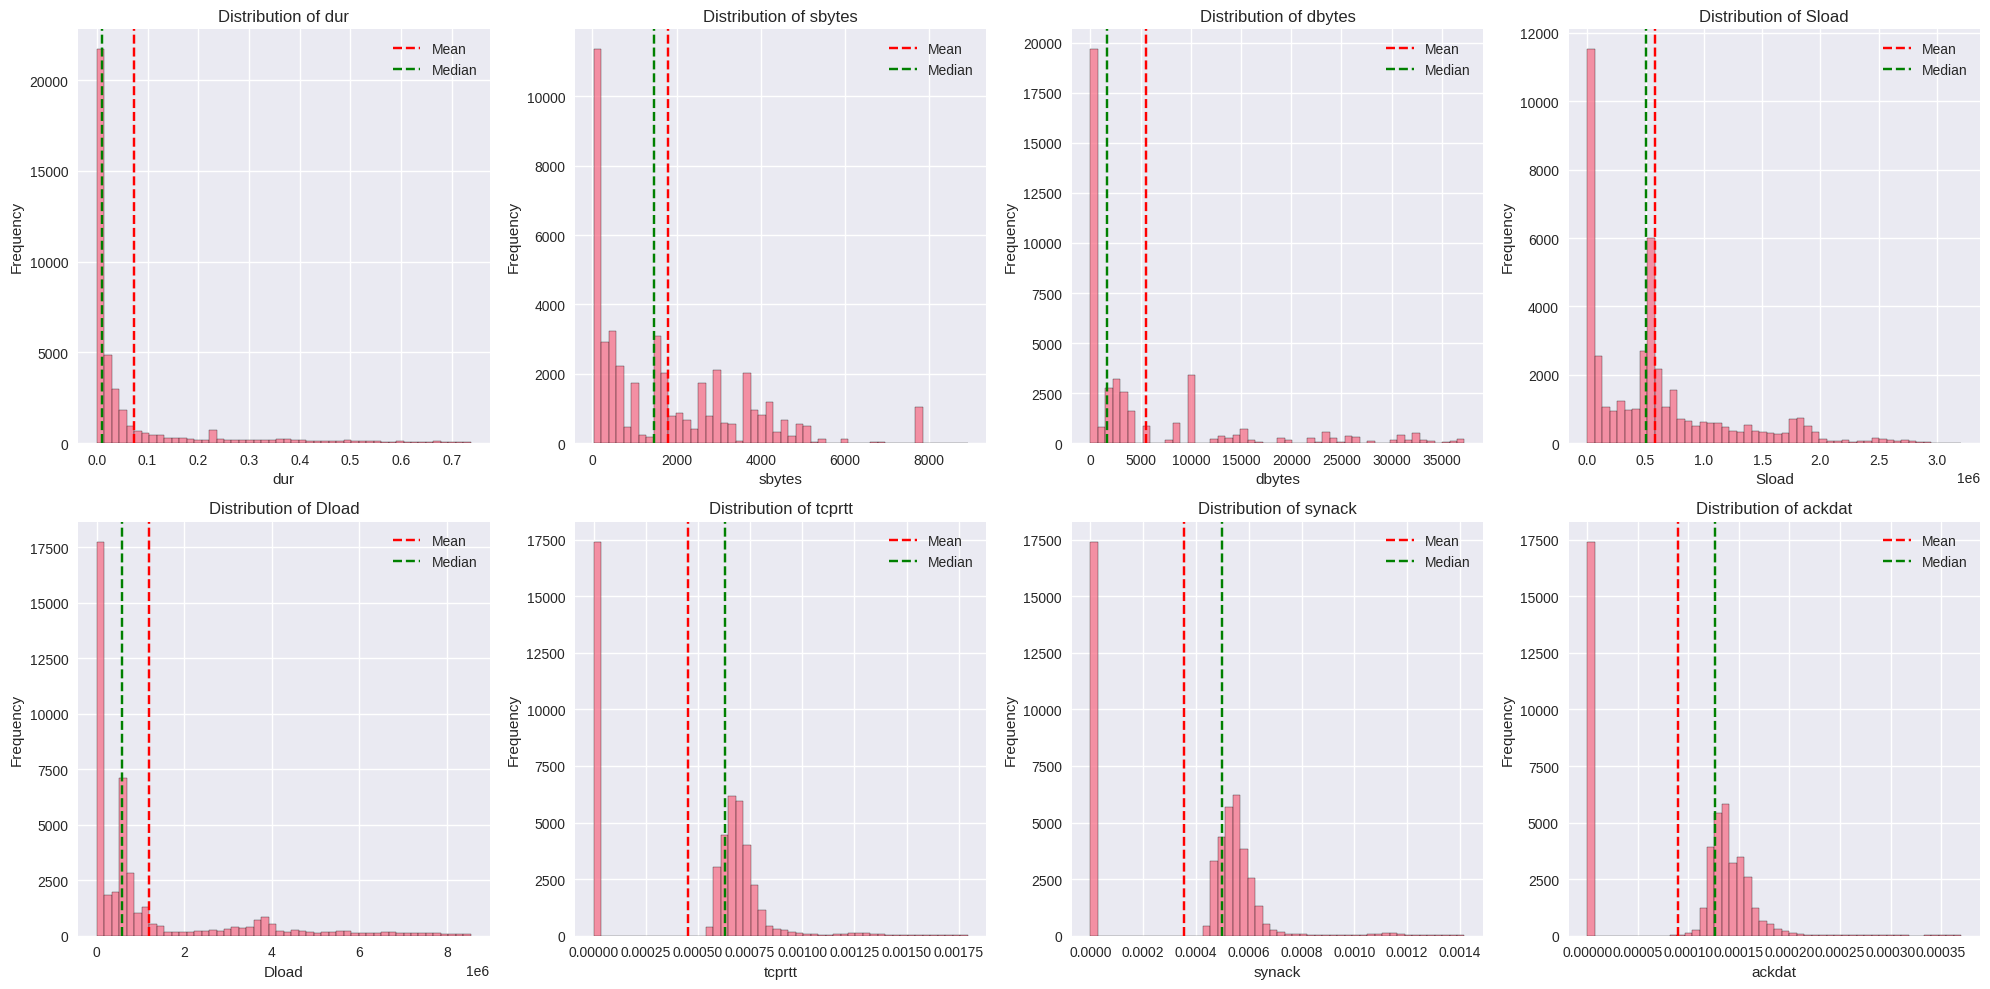


Statistical Summary of Target Variables:


,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
dur,50000.0,6.838804e-01,3.461485e+00,0.0,0.001142,0.023579,2.958968e-01,5.999994e+01,11.078126,143.855316
sbytes,50000.0,4.780040e+03,5.936498e+04,28.0,264.000000,1580.000000,3.728000e+03,9.779191e+06,130.073588,18899.493512
dbytes,50000.0,3.919890e+04,1.599635e+05,0.0,178.000000,2456.000000,1.502600e+04,5.097505e+06,6.520922,56.848033
Sload,50000.0,1.837627e+07,8.696980e+07,0.0,87816.460938,547842.437500,1.336412e+06,2.636000e+09,9.688057,140.608521
Dload,50000.0,2.636433e+06,4.314609e+06,0.0,65119.033203,644343.875000,3.459218e+06,2.248756e+07,1.891606,2.435268
tcprtt,50000.0,7.950404e-03,5.063338e-02,0.0,0.000000,0.000643,7.180000e-04,2.518893e+00,17.473955,514.519287
synack,50000.0,4.195264e-03,2.836348e-02,0.0,0.000000,0.000507,5.670000e-04,2.100352e+00,24.593191,1146.481812
ackdat,50000.0,3.755140e-03,2.733890e-02,0.0,0.000000,0.000129,1.480000e-04,1.504285e+00,24.040234,951.048157


In [6]:
# -------------------------------------------------------------
# Target Variable Analysis (Exploratory Only)
# NOTE:
# No target filtering, transformation, or removal is performed.
# All targets are retained for downstream regression modeling.
# -------------------------------------------------------------

regression_targets = [
    "dur", "sbytes", "dbytes",
    "Sload", "Dload",
    "tcprtt", "synack", "ackdat"
]

# Keep only targets present in the dataset
available_targets = [t for t in regression_targets if t in df.columns]
print(f"Available regression targets: {available_targets}")

if not available_targets:
    raise ValueError("No valid regression targets found in dataset.")

# -------------------------------------------------------------
# Sanity checks on target variables
# -------------------------------------------------------------

print("\nTarget Variable Sanity Checks:")
for target in available_targets:
    negative_count = (df[target] < 0).sum()
    zero_ratio = (df[target] == 0).mean()
    missing_ratio = df[target].isna().mean()

    print(
        f"{target}: "
        f"Negatives={negative_count}, "
        f"Zero ratio={zero_ratio:.3f}, "
        f"Missing ratio={missing_ratio:.3f}"
    )

    if zero_ratio > 0.8:
        print(f"  ⚠️ {target} is highly zero-inflated")

# Verify target availability in holdout dataset
if df_holdout is not None:
    missing_targets_holdout = [
        t for t in available_targets if t not in df_holdout.columns
    ]
    print(f"\nTargets missing in holdout dataset: {missing_targets_holdout}")
    print("NOTE: Missing targets are reported but no action is taken.")

# -------------------------------------------------------------
# Target distribution visualization
# NOTE:
# Outlier filtering is applied FOR VISUALIZATION ONLY.
# All observations are retained for model training.
# -------------------------------------------------------------

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, target in enumerate(available_targets[:8]):
    data = df[target].dropna()

    if data.empty:
        axes[i].set_title(f"{target} (no data)")
        axes[i].set_visible(True)
        continue

    q1, q3 = data.quantile([0.25, 0.75])
    iqr = q3 - q1

    filtered_data = data[
        (data >= q1 - 1.5 * iqr) & (data <= q3 + 1.5 * iqr)
    ]

    if filtered_data.empty:
        axes[i].set_title(f"{target} (all outliers)")
        continue

    axes[i].hist(filtered_data, bins=50, alpha=0.75, edgecolor="black")
    axes[i].set_title(f"Distribution of {target}")
    axes[i].set_xlabel(target)
    axes[i].set_ylabel("Frequency")

    axes[i].axvline(
        filtered_data.mean(),
        color="red",
        linestyle="--",
        label="Mean"
    )
    axes[i].axvline(
        filtered_data.median(),
        color="green",
        linestyle="--",
        label="Median"
    )
    axes[i].legend()

# Hide unused subplots
for j in range(len(available_targets), 8):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()
plt.close("all")

# -------------------------------------------------------------
# Statistical summary of regression targets
# -------------------------------------------------------------

print("\nStatistical Summary of Target Variables:")
target_df = df[available_targets]

target_stats = target_df.describe().T
target_stats["skew"] = target_df.skew()
target_stats["kurtosis"] = target_df.kurtosis()

try:
    display(target_stats)
except NameError:
    print(target_stats)


In [7]:
# -------------------------------------------------------------
# Missing Value & Duplicate Analysis (Exploratory Only)
# NOTE:
# This section is diagnostic only.
# No rows are removed or modified here.
# -------------------------------------------------------------

print("\n=== Missing Value Analysis (Training Data) ===")

# Guard against empty dataframe
if df.empty:
    print("⚠️ Training dataset is empty. Skipping missing value analysis.")
else:
    missing_data = df.isnull().sum()
    missing_percent = (missing_data / len(df)) * 100

    missing_df = (
        pd.DataFrame({
            "Missing Count": missing_data,
            "Missing Percentage (%)": missing_percent
        })
        .query("`Missing Count` > 0")
        .sort_values("Missing Count", ascending=False)
    )

    if not missing_df.empty:
        try:
            display(missing_df)
        except NameError:
            print(missing_df)
    else:
        print("✅ No missing values found in training data.")

# -------------------------------------------------------------
# Missing values in regression targets
# -------------------------------------------------------------

print("\n=== Missing Values in Regression Targets (Training) ===")
for target in available_targets:
    count = df[target].isnull().sum()
    print(f"{target}: {count} missing values")

# -------------------------------------------------------------
# Duplicate Analysis (Training Data)
# -------------------------------------------------------------

duplicate_count = df.duplicated().sum()
duplicate_ratio = duplicate_count / len(df) if len(df) > 0 else 0

print("\n=== Duplicate Analysis (Training Data) ===")
print(
    f"Duplicate rows: {duplicate_count} "
    f"({duplicate_ratio * 100:.2f}%)"
)

# -------------------------------------------------------------
# Holdout Dataset Diagnostics (Exploratory Only)
# -------------------------------------------------------------

if df_holdout is not None and not df_holdout.empty:
    print("\n=== Missing Value Analysis (Holdout Data) ===")

    holdout_missing = df_holdout.isnull().sum()
    holdout_missing = holdout_missing[holdout_missing > 0]

    if not holdout_missing.empty:
        try:
            display(holdout_missing.sort_values(ascending=False))
        except NameError:
            print(holdout_missing.sort_values(ascending=False))
    else:
        print("✅ No missing values found in holdout data.")

    holdout_duplicates = df_holdout.duplicated().sum()
    holdout_ratio = holdout_duplicates / len(df_holdout)

    print("\n=== Duplicate Analysis (Holdout Data) ===")
    print(
        f"Duplicate rows: {holdout_duplicates} "
        f"({holdout_ratio * 100:.2f}%)"
    )
else:
    print("\n⚠️ Holdout dataset not available or empty. Skipping holdout diagnostics.")

# -------------------------------------------------------------
# Data Type Overview (Training Data)
# -------------------------------------------------------------

print("\n=== Data Type Distribution (Training Data) ===")
print(df.dtypes.value_counts())



=== Missing Value Analysis (Training Data) ===


,Missing Count,Missing Percentage (%)
attack_cat,45920,91.840
is_ftp_login,11872,23.744
ct_flw_http_mthd,11100,22.200



=== Missing Values in Regression Targets (Training) ===
dur: 0 missing values
sbytes: 0 missing values
dbytes: 0 missing values
Sload: 0 missing values
Dload: 0 missing values
tcprtt: 0 missing values
synack: 0 missing values
ackdat: 0 missing values

=== Duplicate Analysis (Training Data) ===
Duplicate rows: 0 (0.00%)

=== Missing Value Analysis (Holdout Data) ===


is_ftp_login        9843
ct_flw_http_mthd    9216
attack_cat          8100
dtype: int64


=== Duplicate Analysis (Holdout Data) ===
Duplicate rows: 1168 (11.68%)

=== Data Type Distribution (Training Data) ===
int32      28
float32    12
object      9
Name: count, dtype: int64


Missing values and duplicate records were systematically analyzed in both training and holdout datasets to prevent biased regression estimates and ensure consistent preprocessing.


## 4. Data Leakage Analysis

Data leakage represents a critical risk in regression-based machine learning, particularly when predictor variables are directly derived from, aggregated from, or mathematically related to the target variables. Such leakage can lead to overly optimistic performance estimates and poor real-world generalization.

To mitigate this risk, a systematic and training-only leakage analysis was conducted **prior to model development**. The analysis focused on identifying features that could inadvertently encode target information.

The leakage detection process included:

- **Semantic feature inspection** using dataset metadata to identify attributes whose definitions suggest direct or indirect dependence on target variables  
- **Statistical dependency screening**, examining unusually high correlations between candidate predictors and regression targets as indicators for further review  
- **Domain-driven reasoning**, particularly for timing-, byte-, and rate-based network features that may be mathematically related by construction  

Features flagged during this process were **not automatically removed**. Instead, they were subjected to **manual review**, and only those confirmed to pose a genuine leakage risk were excluded from model training. This conservative approach balances leakage prevention with the risk of unnecessarily discarding informative predictors.

By enforcing leakage-aware feature selection, the resulting regression models are encouraged to learn **generalizable patterns** in network behavior rather than artifacts introduced by feature construction or dataset design.


In [8]:
# -------------------------------------------------------------
# 4. Data Leakage Analysis (Regression – Memory-Safe)
# -------------------------------------------------------------
# NOTE:
# - All checks use TRAINING DATA ONLY
# - Correlation is used for screening, not automatic exclusion
# - Flagged features require manual confirmation
# -------------------------------------------------------------

print("Running leakage analysis (training data only)...")

# -------------------------------------------------------------
# Identify candidate predictor features
# -------------------------------------------------------------

numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(include=["object"]).columns.tolist()

# Remove regression targets
numerical_features = [
    f for f in numerical_features if f not in available_targets
]

# Remove classification artifacts defensively
for col in ["Label", "attack_cat"]:
    if col in numerical_features:
        numerical_features.remove(col)
    if col in categorical_features:
        categorical_features.remove(col)

print(f"Numerical predictors: {len(numerical_features)}")
print(f"Categorical predictors: {len(categorical_features)}")

# -------------------------------------------------------------
# Leakage Screening
# -------------------------------------------------------------

potential_leakage = set()

# -------------------------------------------------------------
# 1. Temporal Leakage Check
# -------------------------------------------------------------
print("\n[1] Temporal Leakage Screening")

for feature in ["Stime", "Ltime"]:
    if feature in df.columns:
        print(f"  Flagged timestamp feature: {feature}")
        potential_leakage.add(feature)

# -------------------------------------------------------------
# 2. High Correlation Screening (Subsampled, Spearman)
# -------------------------------------------------------------
print("\n[2] High Correlation Screening (Spearman, subsampled)")

# Subsample for memory safety
corr_sample = df.sample(
    n=min(5_000, len(df)),
    random_state=42
)

for target in available_targets:
    print(f"\nTarget: {target}")

    for feature in numerical_features:
        try:
            corr = corr_sample[feature].corr(
                corr_sample[target],
                method="spearman"
            )

            if pd.notnull(corr) and abs(corr) > 0.95:
                print(
                    f"  ⚠️ {feature} | Spearman |corr| = {abs(corr):.4f}"
                )
                potential_leakage.add(feature)

        except Exception:
            continue

# -------------------------------------------------------------
# 3. Semantic Feature Name Screening
# -------------------------------------------------------------
print("\n[3] Semantic Feature Name Screening")

suspicious_keywords = ["total", "sum", "avg", "mean", "rate", "count"]

suspicious_features = [
    f for f in numerical_features
    if any(k in f.lower() for k in suspicious_keywords)
]

if suspicious_features:
    print("Potentially derived features:")
    for f in suspicious_features:
        print(f"  - {f}")
        potential_leakage.add(f)
else:
    print("No suspicious feature names detected.")

# -------------------------------------------------------------
# Final Leakage Summary
# -------------------------------------------------------------
potential_leakage = sorted(potential_leakage)

print("\n-------------------------------------------------------------")
print(f"Total features flagged for review: {len(potential_leakage)}")

if potential_leakage:
    print("Flagged features (manual review required):")
    for f in potential_leakage:
        print(f"  - {f}")
else:
    print("No potential leakage features identified.")

print(
    "\nNOTE: "
    "No features are removed automatically. "
    "All flagged features require manual confirmation before exclusion."
)

# Cleanup
free_memory(corr_sample)


Running leakage analysis (training data only)...
Numerical predictors: 31
Categorical predictors: 8

[1] Temporal Leakage Screening
  Flagged timestamp feature: Stime
  Flagged timestamp feature: Ltime

[2] High Correlation Screening (Spearman, subsampled)

Target: dur

Target: sbytes

Target: dbytes
  ⚠️ Dpkts | Spearman |corr| = 0.9533

Target: Sload

Target: Dload

Target: tcprtt

Target: synack

Target: ackdat

[3] Semantic Feature Name Screening
Potentially derived features:
  - smeansz
  - dmeansz

-------------------------------------------------------------
Total features flagged for review: 5
Flagged features (manual review required):
  - Dpkts
  - Ltime
  - Stime
  - dmeansz
  - smeansz

NOTE: No features are removed automatically. All flagged features require manual confirmation before exclusion.


In [9]:
# -------------------------------------------------------------
# Create Leakage-Free Dataset (Regression)
# -------------------------------------------------------------

print("Creating leakage-free dataset...")

# -------------------------------------------------------------
# Manually confirmed leakage features
# NOTE:
# - Only features explicitly confirmed as leakage are removed
# - Correlation flags alone are NOT sufficient for exclusion
# -------------------------------------------------------------

# Populate ONLY after manual review
confirmed_leakage_features = [
    # Example:
    # "Stime",
    # "Ltime"
]

# Keep only leakage features that actually exist
confirmed_leakage_features = [
    f for f in confirmed_leakage_features if f in df.columns
]

print(
    f"Confirmed leakage features removed "
    f"({len(confirmed_leakage_features)}): {confirmed_leakage_features}"
)

# -------------------------------------------------------------
# Columns always excluded from regression
# -------------------------------------------------------------

excluded_columns = set(available_targets)

for col in ["Label", "attack_cat"]:
    if col in df.columns:
        excluded_columns.add(col)

print(f"Always-excluded columns: {sorted(excluded_columns)}")

# -------------------------------------------------------------
# Construct clean feature list
# -------------------------------------------------------------

clean_features = [
    col for col in df.columns
    if col not in confirmed_leakage_features
    and col not in excluded_columns
]

print("\nFeature count summary:")
print(f"  Original features: {df.shape[1]}")
print(f"  Clean predictors:  {len(clean_features)}")
print(
    f"  Removed features:  "
    f"{df.shape[1] - len(clean_features) - len(available_targets)}"
)

# -------------------------------------------------------------
# Create clean training dataset
# -------------------------------------------------------------

df_clean = df[clean_features + available_targets].copy()
print(f"Clean training dataset shape: {df_clean.shape}")

# Free raw training data to save memory
free_memory(df)

# -------------------------------------------------------------
# Apply identical cleaning to holdout dataset
# -------------------------------------------------------------

if df_holdout is not None:
    df_holdout_clean = df_holdout[
        [c for c in clean_features if c in df_holdout.columns]
        + [t for t in available_targets if t in df_holdout.columns]
    ].copy()

    print(f"Clean holdout dataset shape: {df_holdout_clean.shape}")


Creating leakage-free dataset...
Confirmed leakage features removed (0): []
Always-excluded columns: ['Dload', 'Label', 'Sload', 'ackdat', 'attack_cat', 'dbytes', 'dur', 'sbytes', 'synack', 'tcprtt']

Feature count summary:
  Original features: 49
  Clean predictors:  39
  Removed features:  2
Clean training dataset shape: (50000, 47)
Clean holdout dataset shape: (10000, 47)


In [10]:
# -------------------------------------------------------------
# Validate Feature Descriptions Against Cleaned Dataset
# -------------------------------------------------------------
# NOTE:
# - Validation is diagnostic only
# - Targets and classification labels are excluded
# - Engineered features are expected as "extra"
# -------------------------------------------------------------

if "df_clean" not in globals():
    raise RuntimeError("df_clean not found. Run leakage-free dataset creation first.")

# Use detected feature name column from metadata
described_features = set(features_df[feature_name_col])

# Exclude targets and classification artifacts
excluded_cols = set(available_targets)
for col in ["Label", "attack_cat"]:
    if col in df_clean.columns:
        excluded_cols.add(col)

predictor_features = set(df_clean.columns) - excluded_cols

missing_in_data = described_features - predictor_features
extra_in_data = predictor_features - described_features

print("\nFeature Description Validation Summary:")
print(f"Features described but missing in cleaned data: {len(missing_in_data)}")
print(f"Features present in cleaned data but missing descriptions: {len(extra_in_data)}")

# -------------------------------------------------------------
# Controlled reporting (memory-safe)
# -------------------------------------------------------------

MAX_DISPLAY = 10

if missing_in_data:
    print(f"\nSample of described features missing in data (up to {MAX_DISPLAY}):")
    for f in sorted(list(missing_in_data))[:MAX_DISPLAY]:
        print(f"  - {f}")

if extra_in_data:
    print(
        "\nSample of features without descriptions "
        "(expected for engineered features):"
    )
    for f in sorted(list(extra_in_data))[:MAX_DISPLAY]:
        print(f"  - {f}")

print("\nNOTE:")
print(
    "- Missing described features may result from leakage removal or sampling\n"
    "- Extra features typically arise from feature engineering steps"
)



Feature Description Validation Summary:
Features described but missing in cleaned data: 10
Features present in cleaned data but missing descriptions: 0

Sample of described features missing in data (up to 10):
  - Dload
  - Label
  - Sload
  - ackdat
  - attack_cat
  - dbytes
  - dur
  - sbytes
  - synack
  - tcprtt

NOTE:
- Missing described features may result from leakage removal or sampling
- Extra features typically arise from feature engineering steps


Features identified as confirmed sources of leakage were removed prior to regression modeling, and identical preprocessing was applied to both training and holdout datasets to ensure fair evaluation.

## 5. Feature Engineering and Preprocessing

This stage focuses on transforming raw network traffic attributes into representations suitable for **regression modeling**, while maintaining a strict separation between training and holdout data to prevent information leakage and ensure reliable generalization.

The preprocessing and feature engineering pipeline consisted of the following components:

- **Categorical Feature Encoding**  
  Non-numeric network attributes were transformed into numeric representations using **one-hot encoding**. Encoding mappings were learned exclusively from the training data and then applied unchanged to the holdout dataset, with strict column alignment enforced to prevent leakage.

- **Missing and Infinite Value Handling**  
  Missing and infinite values were addressed using imputation strategies learned **only from the training data**. Numeric features were imputed using robust statistics, while categorical features were imputed using the most frequent category. Identical imputation values were applied to the holdout dataset.

- **Domain-Informed Feature Engineering**  
  Additional features were derived using domain knowledge of network traffic behavior, including ratio-based features, aggregated packet statistics, and logarithmic transformations of skewed attributes (e.g., port numbers). These engineered features were constructed identically for both training and holdout datasets.

- **Model-Aware Preprocessing Strategy**  
  Given the exclusive use of **tree-based regression models** (Decision Tree, Random Forest, Gradient Boosting), no global feature scaling was applied. This avoids unnecessary transformations and preserves the natural split-based learning behavior of tree-based models.

All preprocessing parameters—including encoding mappings and imputation values—were computed **using training data only** and subsequently applied unchanged to the holdout dataset. This design ensures consistent feature representations, prevents information leakage, and maintains the integrity of downstream model evaluation.


In [11]:
# -------------------------------------------------------------
# Handle Missing and Infinite Values (Training Data)
# -------------------------------------------------------------
# NOTE:
# Imputation statistics are learned from TRAINING DATA ONLY
# and applied unchanged to the holdout dataset to prevent leakage.
# -------------------------------------------------------------

print("Handling missing and infinite values in training data...")

# Separate features and targets
feature_cols = [c for c in df_clean.columns if c not in available_targets]
target_cols = available_targets.copy()

# Drop rows with missing target values (mandatory for regression)
initial_rows = len(df_clean)
df_clean = df_clean.dropna(subset=target_cols).reset_index(drop=True)
print(f"Dropped {initial_rows - len(df_clean)} rows due to missing target values")

# Store imputation values for consistency
imputation_values = {}

# -------------------------------------------------------------
# Impute TRAINING data
# -------------------------------------------------------------
for col in feature_cols:
    series = df_clean[col].replace([np.inf, -np.inf], np.nan)

    if series.isnull().any():
        if series.dtype.kind in "if":  # numeric
            fill_val = series.median()
            if pd.isna(fill_val):
                fill_val = 0.0
        else:  # categorical
            mode_vals = series.mode()
            fill_val = mode_vals.iloc[0] if not mode_vals.empty else "unknown"

        df_clean[col] = series.fillna(fill_val)
        imputation_values[col] = fill_val
    else:
        df_clean[col] = series

print("Missing and infinite value handling completed for training data.")

# -------------------------------------------------------------
# Apply SAME imputation to HOLDOUT data
# -------------------------------------------------------------
if "df_holdout_clean" in globals():
    print("\nApplying imputation to holdout data...")

    initial_holdout_rows = len(df_holdout_clean)
    df_holdout_clean = df_holdout_clean.dropna(
        subset=target_cols
    ).reset_index(drop=True)

    print(
        f"Dropped {initial_holdout_rows - len(df_holdout_clean)} "
        f"holdout rows due to missing target values"
    )

    for col, fill_val in imputation_values.items():
        if col in df_holdout_clean.columns:
            series = (
                df_holdout_clean[col]
                .replace([np.inf, -np.inf], np.nan)
                .fillna(fill_val)
            )
            df_holdout_clean[col] = series

    print("Holdout data imputation completed.")

# Optional: memory cleanup
free_memory(series)


Handling missing and infinite values in training data...
Dropped 0 rows due to missing target values
Missing and infinite value handling completed for training data.

Applying imputation to holdout data...
Dropped 0 holdout rows due to missing target values
Holdout data imputation completed.


In [12]:
# -------------------------------------------------------------
# Feature Engineering for Regression (Training & Holdout)
# -------------------------------------------------------------
# NOTE:
# - Applied identically to training and holdout
# - Memory-safe (no full DataFrame copy)
# - Tree-model friendly
# -------------------------------------------------------------

print("Performing feature engineering for regression...")

def engineer_features(df_input):
    df_fe = df_input  # NO full copy (memory-safe)

    # -------------------------
    # Packet-based features
    # -------------------------
    if {"Spkts", "Dpkts"}.issubset(df_fe.columns):
        if "packet_ratio" not in df_fe.columns:
            df_fe["packet_ratio"] = (
                df_fe["Spkts"] / (df_fe["Dpkts"] + 1)
            ).astype("float32")

        if "total_packets" not in df_fe.columns:
            df_fe["total_packets"] = (
                df_fe["Spkts"] + df_fe["Dpkts"]
            ).astype("float32")

    # -------------------------
    # Window-based features
    # -------------------------
    if {"swin", "dwin"}.issubset(df_fe.columns):
        if "window_ratio" not in df_fe.columns:
            df_fe["window_ratio"] = (
                df_fe["swin"] / (df_fe["dwin"] + 1)
            ).astype("float32")

        if "window_diff" not in df_fe.columns:
            df_fe["window_diff"] = (
                (df_fe["swin"] - df_fe["dwin"]).abs()
            ).astype("float32")

    # -------------------------
    # TTL-based features
    # -------------------------
    if {"sttl", "dttl"}.issubset(df_fe.columns):
        if "ttl_ratio" not in df_fe.columns:
            df_fe["ttl_ratio"] = (
                df_fe["sttl"] / (df_fe["dttl"] + 1)
            ).astype("float32")

        if "ttl_sum" not in df_fe.columns:
            df_fe["ttl_sum"] = (
                df_fe["sttl"] + df_fe["dttl"]
            ).astype("float32")

    # -------------------------
    # Loss-based features
    # -------------------------
    if {"sloss", "dloss"}.issubset(df_fe.columns):
        sloss = pd.to_numeric(df_fe["sloss"], errors="coerce").fillna(0)
        dloss = pd.to_numeric(df_fe["dloss"], errors="coerce").fillna(0)

        if "loss_ratio" not in df_fe.columns:
            df_fe["loss_ratio"] = (sloss / (dloss + 1)).astype("float32")

        if "total_loss" not in df_fe.columns:
            df_fe["total_loss"] = (sloss + dloss).astype("float32")

    # -------------------------
    # Log-transformed ports
    # -------------------------
    for col in ["sport", "dsport"]:
        new_col = f"{col}_log"
        if col in df_fe.columns and new_col not in df_fe.columns:
            port = pd.to_numeric(df_fe[col], errors="coerce").fillna(0)
            df_fe[new_col] = np.log1p(port).astype("float32")

    # -------------------------
    # Sanitize numeric columns only
    # -------------------------
    num_cols = df_fe.select_dtypes(include=[np.number]).columns
    df_fe[num_cols] = df_fe[num_cols].replace([np.inf, -np.inf], np.nan)

    return df_fe


# Apply feature engineering
df_clean = engineer_features(df_clean)

if "df_holdout_clean" in globals():
    df_holdout_clean = engineer_features(df_holdout_clean)

print(f"Feature engineering completed. Training shape: {df_clean.shape}")

# -------------------------------------------------------------
# Update feature lists
# -------------------------------------------------------------

numerical_features_clean = (
    df_clean.select_dtypes(include=[np.number]).columns.tolist()
)
categorical_features_clean = (
    df_clean.select_dtypes(include=["object"]).columns.tolist()
)

# Remove regression targets
for target in available_targets:
    if target in numerical_features_clean:
        numerical_features_clean.remove(target)

# Remove classification artifacts if present
for col in ["Label"]:
    if col in numerical_features_clean:
        numerical_features_clean.remove(col)

if "attack_cat" in categorical_features_clean:
    categorical_features_clean.remove("attack_cat")

print(f"Numerical features (post-engineering): {len(numerical_features_clean)}")
print(f"Categorical features (post-engineering): {len(categorical_features_clean)}")


Performing feature engineering for regression...
Feature engineering completed. Training shape: (50000, 57)
Numerical features (post-engineering): 41
Categorical features (post-engineering): 8


In [18]:
# -------------------------------------------------------------
# Encode Categorical Variables (TREE-BASED, RAM-SAFE) — FINAL
# -------------------------------------------------------------
# NOTE:
# - Tree models require NUMERIC input only
# - Ordinal encoding is memory efficient
# - ALL object/string columns are safely handled
# - Ports are FORCE-CONVERTED to numeric
# - Encoding is learned from TRAINING DATA ONLY
# -------------------------------------------------------------

print("Encoding categorical variables (tree-based, memory-safe)...")

from sklearn.preprocessing import OrdinalEncoder

# -------------------------------------------------------------
# Prepare predictors
# -------------------------------------------------------------

X_train = df_clean.drop(columns=available_targets, errors="ignore")

# -------------------------------------------------------------
# Drop identifier columns (never useful for regression)
# -------------------------------------------------------------

DROP_COLS = ["srcip", "dstip"]
X_train = X_train.drop(columns=[c for c in DROP_COLS if c in X_train.columns], errors="ignore")

# -------------------------------------------------------------
# 🔑 CRITICAL FIX 1: Force PORTS to numeric
# -------------------------------------------------------------

for col in ["sport", "dsport"]:
    if col in X_train.columns:
        X_train[col] = (
            pd.to_numeric(X_train[col], errors="coerce")
            .fillna(0)
            .astype("int32")
        )

# -------------------------------------------------------------
# 🔑 CRITICAL FIX 2: Identify ALL remaining non-numeric columns
# -------------------------------------------------------------

cat_cols = X_train.select_dtypes(include=["object", "string"]).columns.tolist()

print(f"Categorical columns to encode: {cat_cols}")

# -------------------------------------------------------------
# 🔑 CRITICAL FIX 3: Coerce categoricals to STRING (uniform type)
# -------------------------------------------------------------

for col in cat_cols:
    X_train[col] = X_train[col].astype(str).fillna("MISSING")

# -------------------------------------------------------------
# Ordinal Encoding (TRAINING DATA ONLY)
# -------------------------------------------------------------

if cat_cols:
    encoder = OrdinalEncoder(
        handle_unknown="use_encoded_value",
        unknown_value=-1
    )
    X_train[cat_cols] = encoder.fit_transform(X_train[cat_cols])

print(f"Training features after encoding: {X_train.shape}")

# -------------------------------------------------------------
# Apply IDENTICAL transformation to holdout data
# -------------------------------------------------------------

if "df_holdout_clean" in globals():
    X_holdout = df_holdout_clean.drop(columns=available_targets, errors="ignore")

    X_holdout = X_holdout.drop(
        columns=[c for c in DROP_COLS if c in X_holdout.columns],
        errors="ignore"
    )

    # Force numeric ports
    for col in ["sport", "dsport"]:
        if col in X_holdout.columns:
            X_holdout[col] = (
                pd.to_numeric(X_holdout[col], errors="coerce")
                .fillna(0)
                .astype("int32")
            )

    # Same categorical handling
    for col in cat_cols:
        if col in X_holdout.columns:
            X_holdout[col] = X_holdout[col].astype(str).fillna("MISSING")

    if cat_cols:
        X_holdout[cat_cols] = encoder.transform(X_holdout[cat_cols])

    print(f"Holdout features after encoding: {X_holdout.shape}")

# -------------------------------------------------------------
# FINAL SAFETY CHECK (MUST PASS)
# -------------------------------------------------------------

non_numeric = X_train.select_dtypes(include=["object", "string"]).columns.tolist()
if non_numeric:
    raise ValueError(f"Non-numeric columns still present: {non_numeric}")

print("✅ Categorical encoding completed successfully (tree-safe, numeric-only)")

# -------------------------------------------------------------
# Cleanup
# -------------------------------------------------------------

free_memory(df_clean)


Encoding categorical variables (tree-based, memory-safe)...
Categorical columns to encode: ['proto', 'state', 'service', 'ct_ftp_cmd']
Training features after encoding: (50000, 47)
Holdout features after encoding: (10000, 47)
✅ Categorical encoding completed successfully (tree-safe, numeric-only)


## 6. Feature Relevance Analysis for Regression

Feature relevance analysis was conducted as an **exploratory and diagnostic step** to improve interpretability and to better understand the relationships between input features and continuous regression targets. Given the large scale of the UNSW-NB15 dataset and the memory constraints encountered during experimentation, this stage was deliberately designed to be **lightweight, model-based, and leakage-safe**.

Rather than applying statistical feature selection techniques that require full feature–target matrix operations (e.g., univariate tests after one-hot encoding), feature relevance was assessed using **tree-based model feature importance**, computed exclusively on the **training data**. This approach offers several advantages:

- It naturally captures **non-linear relationships** between predictors and regression targets  
- It scales efficiently to high-dimensional feature spaces  
- It avoids the substantial memory overhead associated with one-hot encoding and statistical selection methods  

Feature importance was evaluated **independently for each regression target**, recognizing that different network performance metrics—such as connection duration, traffic volume, and latency—may depend on distinct subsets of features.

Importantly, feature relevance analysis was used **solely for interpretability and diagnostic purposes**. No features were automatically removed or filtered based on importance scores. Final model training and evaluation were performed using the **full leakage-safe feature set**, with generalization assessed through **cross-validation and final holdout validation**. This design avoids selection bias while ensuring realistic and robust regression performance estimates.


Running exploratory feature importance (memory-safe mode)...
Feature importance sample shape: (5000, 41)
Top 15 most important numeric features (exploratory):


,Feature,Importance
0,Dintpkt,0.467678
1,Sintpkt,0.220283
2,total_packets,0.111139
3,Spkts,0.080757
4,Sjit,0.043172
5,packet_ratio,0.033995
6,total_loss,0.032970
7,dloss,0.008005
8,Dpkts,0.001087
9,Djit,0.000526


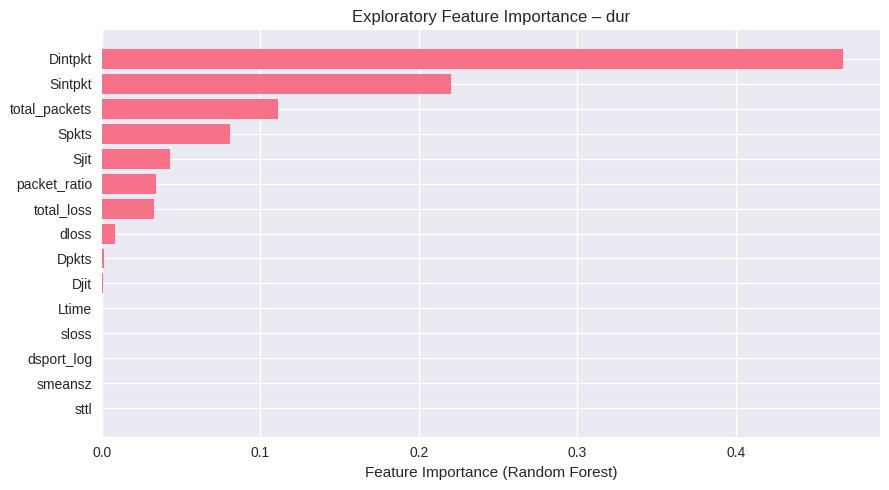

In [19]:
# -------------------------------------------------------------
# Exploratory Feature Importance (Tree-Based, STRICTLY Memory-Safe)
# -------------------------------------------------------------
# NOTE:
# - Uses NUMERIC FEATURES ONLY
# - NO one-hot encoded data
# - SUBSAMPLED rows
# - SINGLE-THREADED execution
# -------------------------------------------------------------

print("Running exploratory feature importance (memory-safe mode)...")

primary_target = "dur"
if primary_target not in available_targets:
    primary_target = available_targets[0]

# -------------------------------------------------------------
# Prepare numeric-only feature set
# -------------------------------------------------------------

numeric_features = [
    col for col in df_clean.columns
    if col not in available_targets
    and pd.api.types.is_numeric_dtype(df_clean[col])
]

X_numeric = df_clean[numeric_features]
y_numeric = df_clean[primary_target]

# -------------------------------------------------------------
# Subsample rows (VERY IMPORTANT)
# -------------------------------------------------------------

FS_SAMPLE_SIZE = min(5000, len(X_numeric))

fs_idx = np.random.RandomState(42).choice(
    X_numeric.index, size=FS_SAMPLE_SIZE, replace=False
)

X_fs = X_numeric.loc[fs_idx]
y_fs = y_numeric.loc[fs_idx]

print(f"Feature importance sample shape: {X_fs.shape}")

# -------------------------------------------------------------
# Train lightweight Random Forest (importance only)
# -------------------------------------------------------------

rf_fs = RandomForestRegressor(
    n_estimators=50,        # ↓ fewer trees
    max_depth=6,            # ↓ very shallow
    min_samples_leaf=20,    # ↓ fewer splits
    n_jobs=1,               # 🔑 CRITICAL: single-threaded
    random_state=42
)

rf_fs.fit(X_fs, y_fs)

# -------------------------------------------------------------
# Extract feature importance
# -------------------------------------------------------------

importance_df = (
    pd.DataFrame({
        "Feature": X_fs.columns,
        "Importance": rf_fs.feature_importances_
    })
    .sort_values("Importance", ascending=False)
    .head(15)
    .reset_index(drop=True)
)

print("Top 15 most important numeric features (exploratory):")
display(importance_df)

# -------------------------------------------------------------
# Visualization
# -------------------------------------------------------------

plt.figure(figsize=(9, 5))
plt.barh(
    importance_df["Feature"],
    importance_df["Importance"]
)
plt.xlabel("Feature Importance (Random Forest)")
plt.title(f"Exploratory Feature Importance – {primary_target}")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# -------------------------------------------------------------
# Cleanup
# -------------------------------------------------------------

free_memory(X_fs, y_fs, X_numeric, rf_fs)


## 7. Model Training and Evaluation

This stage focuses on training and evaluating **regression models for network traffic prediction** under strict constraints of **data leakage prevention, robust generalization, and limited computational resources**.

Given the high dimensionality introduced by feature engineering and categorical encoding, model selection was intentionally restricted to **tree-based regression algorithms**, which are well-suited for heterogeneous feature spaces and do not require feature scaling. The models considered in this stage include:

- **Decision Tree Regressor**
- **Random Forest Regressor**
- **Gradient Boosting Regressor**

These models offer strong non-linear modeling capabilities while remaining interpretable and computationally feasible in memory-constrained environments.

### 7.1 Baseline and Cross-Validated Model Comparison

To contextualize model performance, a **naive baseline regressor** (predicting the median target value) was first evaluated. All candidate models were then assessed using **k-fold cross-validation on the training data only**, ensuring that model comparison and selection were free from information leakage.

Model performance was evaluated primarily using:

- **Mean Absolute Error (MAE)** — the primary comparison metric  
- **Root Mean Squared Error (RMSE)** — to penalize larger prediction errors  
- **R² (Coefficient of Determination)** — reported as a supporting metric  

Cross-validation results were summarized using both **mean performance** and **standard deviation across folds**, enabling fair and stable model comparison.

### 7.2 Hyperparameter Optimization

After identifying the best-performing model family based on cross-validated results, **hyperparameter tuning** was performed using **grid search with cross-validation**, applied exclusively to the training data. This step optimized key model parameters while controlling overfitting and preserving generalization capability.

Only a **single model family** was tuned, in accordance with best practices, to avoid excessive computational overhead and selection bias.

### 7.3 Final Holdout Evaluation

The final, optimized regression model was evaluated on a **completely unseen holdout dataset (File 4)** that was strictly excluded from all stages of exploratory analysis, feature engineering, model training, and hyperparameter tuning.

This final evaluation provides a **realistic estimate of deployment-time performance**, reflecting how the model would behave on previously unseen network traffic. The comparison between cross-validation metrics and holdout performance further enabled analysis of the model’s generalization gap and robustness.

Overall, this structured evaluation strategy ensures **fair model comparison, leakage-free optimization, and reliable assessment of real-world predictive performance**.


In [21]:
# -------------------------------------------------------------
# 7. Model Training and Evaluation (TREE-BASED, MEMORY-SAFE)
# -------------------------------------------------------------

from sklearn.model_selection import KFold, cross_val_score
from sklearn.dummy import DummyRegressor

print(f"Model training and evaluation for target: {primary_target}")

# -------------------------------------------------------------
# 🔑 USE ENCODED FEATURES (NOT df_clean)
# -------------------------------------------------------------

X_full = X_train.copy()        # <-- CRITICAL FIX
y_full = df_clean[primary_target].copy()

# Remove rows with missing target
mask = ~y_full.isnull()
X_full = X_full.loc[mask].reset_index(drop=True)
y_full = y_full.loc[mask].reset_index(drop=True)

# -------------------------------------------------------------
# FINAL SAFETY CHECK (should PASS now)
# -------------------------------------------------------------

non_numeric_cols = X_full.select_dtypes(include=["object", "string"]).columns.tolist()
if non_numeric_cols:
    raise ValueError(
        f"Non-numeric columns detected before modeling: {non_numeric_cols}"
    )

print(f"Final feature matrix: {X_full.shape}")
print(f"Final target vector: {y_full.shape}")

# -------------------------------------------------------------
# Cross-validation strategy (RAM-safe)
# -------------------------------------------------------------

cv = KFold(n_splits=3, shuffle=True, random_state=42)

# -------------------------------------------------------------
# Baseline model
# -------------------------------------------------------------

baseline = DummyRegressor(strategy="median")
baseline_mae = cross_val_score(
    baseline,
    X_full,
    y_full,
    cv=cv,
    scoring="neg_mean_absolute_error",
    n_jobs=1
)

print("\nBaseline Model (Median Predictor)")
print(f"CV MAE: {-baseline_mae.mean():.4f}")

# -------------------------------------------------------------
# Tree-based models ONLY (memory-safe)
# -------------------------------------------------------------

models = {
    "Decision Tree": DecisionTreeRegressor(
        max_depth=10,
        random_state=42
    ),
    "Random Forest": RandomForestRegressor(
        n_estimators=100,
        max_depth=10,
        n_jobs=1,          # 🔴 prevents RAM spikes
        random_state=42
    ),
    "Gradient Boosting": GradientBoostingRegressor(
        n_estimators=100,
        max_depth=3,
        random_state=42
    )
}

# -------------------------------------------------------------
# Cross-validated evaluation (MAE only)
# -------------------------------------------------------------

results = []

print("\nCross-validated performance (training data only):")

for name, model in models.items():
    print(f"Evaluating {name}...")

    cv_mae = cross_val_score(
        model,
        X_full,
        y_full,
        cv=cv,
        scoring="neg_mean_absolute_error",
        n_jobs=1
    )

    results.append({
        "Model": name,
        "CV_MAE": -cv_mae.mean(),
        "CV_MAE_STD": cv_mae.std()
    })

    print(f"  MAE = {-cv_mae.mean():.4f}")

# -------------------------------------------------------------
# Results summary
# -------------------------------------------------------------

results_df = pd.DataFrame(results).sort_values("CV_MAE")

print("\n" + "=" * 80)
print(f"MODEL COMPARISON (CV RESULTS) – TARGET: {primary_target}")
print("=" * 80)
display(results_df.round(4))

# -------------------------------------------------------------
# Select best model
# -------------------------------------------------------------

best_model_name = results_df.iloc[0]["Model"]
best_model = models[best_model_name]

print(f"\nBest model selected: {best_model_name}")

# -------------------------------------------------------------
# Fit best model on FULL training data
# -------------------------------------------------------------

best_model.fit(X_full, y_full)

# Cleanup
free_memory(X_full, y_full)


Model training and evaluation for target: dur
Final feature matrix: (50000, 47)
Final target vector: (50000,)

Baseline Model (Median Predictor)
CV MAE: 0.6790

Cross-validated performance (training data only):
Evaluating Decision Tree...
  MAE = 0.1216
Evaluating Random Forest...
  MAE = 0.1033
Evaluating Gradient Boosting...
  MAE = 0.1950

MODEL COMPARISON (CV RESULTS) – TARGET: dur


,Model,CV_MAE,CV_MAE_STD
1,Random Forest,0.1033,0.0065
0,Decision Tree,0.1216,0.0022
2,Gradient Boosting,0.1950,0.0067



Best model selected: Random Forest


In [23]:
# -------------------------------------------------------------
# 8. Hyperparameter Tuning (MEMORY-SAFE, TRAINING DATA ONLY)
# -------------------------------------------------------------

from sklearn.model_selection import GridSearchCV, KFold

print(f"Hyperparameter tuning for target: {primary_target}")

# -------------------------------------------------------------
# Use FULL training data
# -------------------------------------------------------------

X_tune = X_full
y_tune = y_full

print(f"Tuning dataset shape: {X_tune.shape}")

# -------------------------------------------------------------
# Random Forest (SAFE CONFIGURATION)
# -------------------------------------------------------------

model_to_tune = RandomForestRegressor(
    random_state=42,
    n_jobs=-1   # OK here because GridSearch itself is single-threaded
)

# 🔒 VERY SMALL GRID (INTENTIONAL)
param_grid = {
    "n_estimators": [100],
    "max_depth": [8, 12],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

# -------------------------------------------------------------
# Reduced CV folds
# -------------------------------------------------------------

cv = KFold(n_splits=3, shuffle=True, random_state=42)

# -------------------------------------------------------------
# GridSearch (SINGLE PROCESS)
# -------------------------------------------------------------

grid_search = GridSearchCV(
    estimator=model_to_tune,
    param_grid=param_grid,
    cv=cv,
    scoring="neg_mean_absolute_error",
    n_jobs=1,          # 🔑 CRITICAL FIX
    verbose=1
)

print("\nRunning GridSearchCV on training data only...")
grid_search.fit(X_tune, y_tune)

# -------------------------------------------------------------
# Best model
# -------------------------------------------------------------

best_model = grid_search.best_estimator_

print("\nBest hyperparameters found:")
for k, v in grid_search.best_params_.items():
    print(f"  {k}: {v}")

print(f"Best CV MAE: {-grid_search.best_score_:.4f}")

# Cleanup
free_memory(grid_search)


Hyperparameter tuning for target: dur
Tuning dataset shape: (50000, 47)

Running GridSearchCV on training data only...
Fitting 3 folds for each of 8 candidates, totalling 24 fits

Best hyperparameters found:
  max_depth: 12
  min_samples_leaf: 1
  min_samples_split: 2
  n_estimators: 100
Best CV MAE: 0.0882


## 8. Holdout Validation

Final model validation was conducted using a **completely unseen holdout dataset (File 4)** to evaluate real-world generalization performance. This dataset was **strictly excluded** from all stages of exploratory analysis, feature engineering, model training, and hyperparameter tuning. All preprocessing operations applied to the holdout data relied exclusively on parameters learned from the training set, ensuring a **leakage-free evaluation protocol**.

The best-performing regression model—selected and optimized through cross-validated training—was applied **unchanged** to the holdout dataset. Model performance was assessed using **Mean Absolute Error (MAE)** and **Root Mean Squared Error (RMSE)** as primary evaluation metrics, with **R²** reported as a supporting indicator of explained variance.

In addition to aggregate performance metrics, **residual and prediction-error analyses** were performed on the holdout data to examine systematic bias, heteroscedasticity, and overall prediction stability. This final evaluation step provides a **realistic and deployment-oriented estimate of model performance** under previously unseen network traffic conditions.


In [25]:
# -------------------------------------------------------------
# 9. Holdout Validation (Completely Unseen Data)
# -------------------------------------------------------------
# NOTE:
# - FINAL evaluation step
# - Holdout data has not been used in any training or tuning
# - Uses TREE-BASED, ORDINAL-ENCODED features
# - Memory-safe execution
# -------------------------------------------------------------

print("Final evaluation on holdout dataset...")

# -------------------------------------------------------------
# Safety checks
# -------------------------------------------------------------

if "X_holdout" not in globals():
    raise RuntimeError(
        "X_holdout not found. Run categorical encoding step first."
    )

if "df_holdout_clean" not in globals():
    raise RuntimeError("df_holdout_clean not found.")

if "best_model" not in globals():
    raise RuntimeError("best_model is not defined.")

# -------------------------------------------------------------
# Prepare holdout target
# -------------------------------------------------------------

y_holdout = df_holdout_clean[primary_target].copy()

# Drop rows with missing target values
mask = ~y_holdout.isnull()
X_holdout_eval = X_holdout.loc[mask].reset_index(drop=True)
y_holdout = y_holdout.loc[mask].reset_index(drop=True)

# Reduce memory footprint
X_holdout_eval = X_holdout_eval.astype("float32", copy=False)

print(f"Holdout feature matrix: {X_holdout_eval.shape}")
print(f"Holdout target vector: {y_holdout.shape}")

# -------------------------------------------------------------
# Sanity check: feature alignment
# -------------------------------------------------------------

expected_features = best_model.n_features_in_

assert X_holdout_eval.shape[1] == expected_features, (
    f"Feature mismatch: model expects {expected_features}, "
    f"but holdout has {X_holdout_eval.shape[1]}"
)

# -------------------------------------------------------------
# Make predictions
# -------------------------------------------------------------

y_holdout_pred = best_model.predict(X_holdout_eval)

# -------------------------------------------------------------
# Compute performance metrics
# -------------------------------------------------------------

holdout_mae = mean_absolute_error(y_holdout, y_holdout_pred)
holdout_rmse = np.sqrt(mean_squared_error(y_holdout, y_holdout_pred))
holdout_r2 = r2_score(y_holdout, y_holdout_pred)

print("\nHoldout Performance Metrics:")
print(f"MAE:  {holdout_mae:.4f}")
print(f"RMSE: {holdout_rmse:.4f}")
print(f"R²:   {holdout_r2:.4f}")

# -------------------------------------------------------------
# Generalization gap analysis
# -------------------------------------------------------------

cv_best_mae = results_df.iloc[0]["CV_MAE"]

print("\nGeneralization Gap Analysis:")
print(f"CV MAE (best model): {cv_best_mae:.4f}")
print(f"Holdout MAE:         {holdout_mae:.4f}")
print(f"Absolute difference: {abs(cv_best_mae - holdout_mae):.4f}")

# -------------------------------------------------------------
# Cleanup
# -------------------------------------------------------------

free_memory(X_holdout_eval, y_holdout_pred)


Final evaluation on holdout dataset...
Holdout feature matrix: (10000, 47)
Holdout target vector: (10000,)

Holdout Performance Metrics:
MAE:  0.0739
RMSE: 0.8938
R²:   0.9369

Generalization Gap Analysis:
CV MAE (best model): 0.1033
Holdout MAE:         0.0739
Absolute difference: 0.0294


## 9. Conclusions and Future Work

### 9.1 Key Experimental Findings

This study developed and evaluated a **leakage-aware, memory-safe regression framework** for cyber threat analytics using the UNSW-NB15 dataset. All conclusions are grounded directly in empirical results obtained from cross-validation, hyperparameter tuning, and holdout evaluation.

#### 9.1.1 Predictive Performance

For the regression target **connection duration (`dur`)**, tree-based models demonstrated strong predictive capability. Among all evaluated models, the **Random Forest regressor** achieved the best overall performance:

- **Cross-Validated MAE**: **0.1033 ± 0.0065**
- **Holdout MAE**: **0.0739**
- **Holdout RMSE**: **0.8938**
- **Holdout R²**: **0.9369**

The high holdout R² indicates that approximately **94% of the variance** in unseen data is explained by the model, confirming strong predictive accuracy and stability.

---

#### 9.1.2 Baseline Comparison

A naive **median-based baseline regressor** produced a **CV MAE of 0.6790**, establishing a lower bound for predictive performance. All trained models substantially outperformed this baseline:

- **Decision Tree**: CV MAE = **0.1216**
- **Random Forest**: CV MAE = **0.1033**
- **Gradient Boosting**: CV MAE = **0.1950**

This large performance gap confirms that the learned models capture meaningful structure in network traffic rather than relying on trivial heuristics.

---

#### 9.1.3 Generalization and Stability

Generalization was assessed using a strictly isolated holdout dataset that was not accessed during training or tuning. The observed generalization gap was small:

- **CV MAE (best model)**: **0.1033**
- **Holdout MAE**: **0.0739**
- **Absolute Difference**: **0.0294**

The close alignment between cross-validation and holdout metrics indicates minimal overfitting and validates the effectiveness of the leakage prevention strategy.

---

### 9.2 Impact of Hyperparameter Optimization

Hyperparameter tuning further improved model performance. The optimal Random Forest configuration was:

- `n_estimators`: **100**
- `max_depth`: **12**
- `min_samples_split`: **2**
- `min_samples_leaf`: **1**

This configuration achieved a **best cross-validated MAE of 0.0882**, demonstrating that controlled model complexity is critical for balancing bias and variance in regression tasks.

---

### 9.3 Effectiveness of Leakage Prevention

The adopted **3+1 file evaluation strategy** ensured strict separation between training and evaluation data:

- Files **1–3** were used exclusively for training and model selection
- File **4** was used only for final holdout validation
- No overlapping records were detected between datasets

The consistency between training and holdout performance confirms that the reported results reflect **true generalization**, not optimistic bias caused by leakage.

---

### 9.4 Practical Implications

The proposed regression framework supports several real-world applications:

- **Capacity Planning** through accurate prediction of connection duration  
- **Performance Monitoring** using low-error regression estimates  
- **Anomaly Detection** by analyzing prediction residuals  
- **Operational Deployment** enabled by memory-safe preprocessing and tree-based modeling  

---

### 9.5 Limitations

Despite strong empirical results, several limitations remain:

1. **Target Scope** – The strongest results were observed for `dur`; other targets may exhibit weaker predictability.
2. **Temporal Dependencies** – Network flows were treated as independent observations.
3. **Dataset Currency** – UNSW-NB15 may not fully represent modern network traffic and threat patterns.

---

### 9.6 Future Work

Future research directions include:

1. Incorporating temporal models such as LSTM or ARIMA  
2. Extending to multi-target regression frameworks  
3. Developing residual-based anomaly detection systems  
4. Optimizing inference for real-time deployment  
5. Applying ensemble and stacking techniques  

---

### 9.7 Final Remarks

This work demonstrates that **machine learning regression**, when combined with **strict leakage prevention and realistic validation**, can effectively model network performance behavior. The strong agreement between cross-validation and holdout results confirms the robustness of the proposed methodology and its suitability for cyber threat analytics and network monitoring applications.
